<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/V2_C%C3%B3pia_de_LAD_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [3]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#FUNCOES


In [5]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_eixos_vodafone():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS'
    ficheiros = ['eixos_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO_UTF8.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_abril.csv', 'grelhas_maio.csv', 'grelhas_junho.csv', 'grelhas_julho.csv', 'grelhas_agosto.csv', 'grelhas_setembro.csv', 'grelhas_outubro.csv', 'grelhas_novembro.csv', 'grelhas_dezembro.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def ler_grelhas_vodafone_paco():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE GRELHA'
    ficheiros = ['grelhas_outubro_paco.csv', 'grelhas_novembro_paco.csv', 'grelhas_dezembro_paco.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result



def ler_waze():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/WAZE JAMS'
    ficheiros = ['waze_2022_ate_2022-07-18.csv','waze_2022_desde_2022-07-18.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()

def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

#FUNCAO FOI USADA PREVIAMENTE PARA FILTRAR AS HORAS DE PONTA E TORNAR OS FICHEIROS MAIS
def filtrar_horas(df, coluna_datetime):
    """
    Filtra um DataFrame para manter apenas as linhas onde os horários em 'coluna_datetime'
    estão entre 7-10 da manhã e 17-20h.

    Parâmetros:
    df (pandas.DataFrame): DataFrame a ser filtrado.
    coluna_datetime (str): Nome da coluna que contém os dados de data e hora.

    Retorna:
    pandas.DataFrame: DataFrame filtrado.
    """
    # Garantir que a coluna Datetime está no formato correto
    df[coluna_datetime] = pd.to_datetime(df[coluna_datetime])

    # Filtrar para manter as horas entre 7-10 da manhã e 17-20h
    df_filtrado = df[((df[coluna_datetime].dt.hour >= 7) & (df[coluna_datetime].dt.hour < 10)) |
                     ((df[coluna_datetime].dt.hour >= 17) & (df[coluna_datetime].dt.hour < 20))]

    return df_filtrado

def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    else:
        return None


In [5]:
#data_emel = ler_emel()
#data_waze = ler_waze()
data_paco = ler_grelhas_vodafone_paco()
#data_vodafone_eixos = ler_eixos_vodafone()
#data_vodafone_grelhas = ler_grelhas_vodafone()
#data_quadriculas_vodafone_bruto = ler_quadriculas_vodafone_bruto()

In [6]:
#converter valores em datetime
#data_vodafone_eixos['Datetime'] = pd.to_datetime(data_vodafone_eixos['Datetime'], format='%Y.%m.%d %H:%M:%S')
data_paco['Datetime'] = pd.to_datetime(data_paco['Datetime'], format='%Y.%m.%d %H:%M:%S')
#data_vodafone_grelhas['Datetime'] = pd.to_datetime(data_vodafone_grelhas['Datetime'], format='%d.%m.Y %H:%M:%S')

In [ ]:
#Remove data
remove_cols = ['extract_year_2', 'extract_month_3', 'extract_day_4', 'id_eixo_viario']
data_vodafone_eixos = data_vodafone_eixos.drop(columns=remove_cols)


In [ ]:
#Voltar a meter mes e dia para nao dar erro
data_vodafone_eixos['Month'] = data_vodafone_eixos['Datetime'].dt.month
data_vodafone_eixos['Day'] = data_vodafone_eixos['Datetime'].dt.day
data_vodafone_eixos['Weekday'] = data_vodafone_eixos['Datetime'].dt.day_name()

data_vodafone_eixos['Weekday'] = data_vodafone_eixos['Weekday'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})


data_vodafone_eixos['Season'] = data_vodafone_eixos['Month'].apply(month_to_season)

# Criando um mapeamento para o encoding das estações do ano
seasons_encoding = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}

# Aplicar o encoding ao DataFrame para criar a coluna 'Season_Encoded'
data_vodafone_eixos['Season_Encoded'] = data_vodafone_eixos['Season'].map(seasons_encoding)

data_vodafone_eixos['Season'] = data_vodafone_eixos['Month'].apply(month_to_season)


In [ ]:
data_vodafone_eixos

,Unnamed: 0,Eixo,Datetime,C12,C13,Month,Day,Weekday,Season,Season_Encoded
0,28,N117 (Cabos Ávila),2022-01-01 08:20:00+00:00,35.310001,23.950001,1,1,6,Winter,4
1,29,N117 (Cabos Ávila),2022-01-01 08:25:00+00:00,65.620003,82.110001,1,1,6,Winter,4
2,30,IC16,2022-01-01 08:25:00+00:00,0.000000,0.000000,1,1,6,Winter,4
3,31,A36 (Túnel do Grilo),2022-01-01 08:25:00+00:00,24.450001,0.000000,1,1,6,Winter,4
4,32,Ponte Vasco da Gama,2022-01-01 08:25:00+00:00,10.690000,10.690000,1,1,6,Winter,4
...,...,...,...,...,...,...,...,...,...,...
110725,443378,IC2 (Sacavém),2022-12-31 18:45:00+00:00,232.360001,239.389999,12,31,6,Winter,4
110726,443379,IC2 (Sacavém),2022-12-31 19:00:00+00:00,195.490005,120.790001,12,31,6,Winter,4
110727,443380,IC2 (Sacavém),2022-12-31 19:15:00+00:00,219.899994,211.419998,12,31,6,Winter,4
110728,443381,IC2 (Sacavém),2022-12-31 19:30:00+00:00,295.079987,312.059998,12,31,6,Winter,4


Remove unecessary data

Feature Engineering e Encoders

In [ ]:
#TREINAR O MODELO ##PRIMEIRO LSTM SERIES TEMPORAIS

In [ ]:
#LSTM
#imports
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

##EXEMPLO PREDICT ENTRADAS


#Filtar apenas por Ponte Vasco da Gama
df_vascodagama = data_vodafone_eixos[data_vodafone_eixos['Eixo']== 'Ponte Vasco da Gama']
df_vascodagama.set_index('Datetime', inplace=True)


In [ ]:
df_vascodagama

,Unnamed: 0,Eixo,C12,C13,Month,Day,Weekday,Season,Season_Encoded
Datetime,,,,,,,,,
2022-01-01 08:25:00+00:00,32,Ponte Vasco da Gama,10.690000,10.690000,1,1,6,Winter,4
2022-01-01 08:30:00+00:00,33,Ponte Vasco da Gama,0.000000,0.000000,1,1,6,Winter,4
2022-01-01 08:35:00+00:00,35,Ponte Vasco da Gama,23.170000,0.000000,1,1,6,Winter,4
2022-01-01 09:10:00+00:00,39,Ponte Vasco da Gama,13.470000,12.140000,1,1,6,Winter,4
2022-01-01 08:45:00+00:00,48,Ponte Vasco da Gama,0.000000,0.000000,1,1,6,Winter,4
...,...,...,...,...,...,...,...,...,...
2022-12-31 18:45:00+00:00,440403,Ponte Vasco da Gama,131.169998,51.270000,12,31,6,Winter,4
2022-12-31 19:00:00+00:00,440404,Ponte Vasco da Gama,90.260002,95.209999,12,31,6,Winter,4
2022-12-31 19:15:00+00:00,440405,Ponte Vasco da Gama,59.720001,62.660000,12,31,6,Winter,4


<Axes: xlabel='Datetime'>

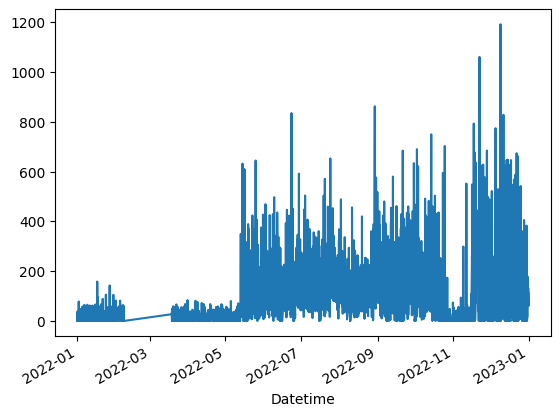

In [ ]:
temp = df_vascodagama['C12']
temp.plot()


<Axes: xlabel='Datetime'>

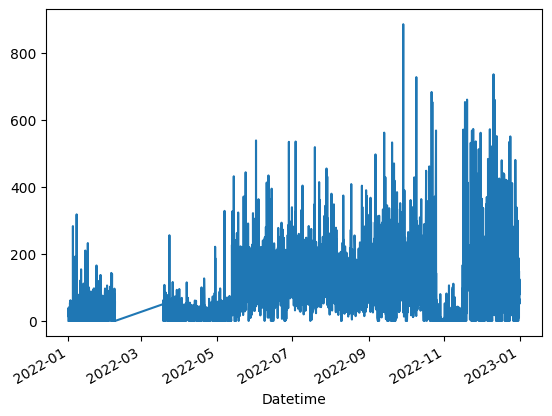

In [ ]:
temp = df_vascodagama['C13']
temp.plot()


In [ ]:
dt_features = df_vascodagama[['Month','Day','C12','Weekday','Season_Encoded']]
dt_target = df_vascodagama['C13']

In [ ]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

features_scaled = scaler_features.fit_transform(dt_features)
target_scaled = scaler_target.fit_transform(dt_target.values.reshape(-1, 1))

#4Amostras por hora

timesteps = 12;

X = []

y = []

for i in range(len(features_scaled) - timesteps):
  X.append(features_scaled[i:i + timesteps])
  y.append(target_scaled[i + timesteps])


X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(timesteps, features_scaled.shape[1])))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
251/251 [==============================] - 7s 15ms/step - loss: 0.6506
Epoch 2/10
251/251 [==============================] - 4s 17ms/step - loss: 0.4699
Epoch 3/10
251/251 [==============================] - 4s 14ms/step - loss: 0.4483
Epoch 4/10
251/251 [==============================] - 4s 16ms/step - loss: 0.4343
Epoch 5/10
251/251 [==============================] - 4s 17ms/step - loss: 0.4274
Epoch 6/10
251/251 [==============================] - 4s 14ms/step - loss: 0.4249
Epoch 7/10
251/251 [==============================] - 4s 14ms/step - loss: 0.4169
Epoch 8/10
251/251 [==============================] - 4s 17ms/step - loss: 0.4134
Epoch 9/10
251/251 [==============================] - 4s 14ms/step - loss: 0.4075
Epoch 10/10
251/251 [==============================] - 4s 14ms/step - loss: 0.4062


In [2]:
#
data_vodafone_paco = ler_grelhas_vodafone_paco()
data_vodafone_paco['Datetime'] = pd.to_datetime(data_vodafone_paco['Datetime'], format='%Y.%m.%d %H:%M:%S')

NameError: ignored

In [ ]:
data_vodafone_paco

,Unnamed: 0,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,D1
0,1091614,407,2022-10-01 23:45:00+00:00,648.750000,334.679993,648.750000,334.679993,0.000000,99.309998,0.000000,57.009998,642.650024,328.570007,6.100000,United States of America;France;Netherlands;Un...
1,1091615,407,2022-10-01 16:45:00+00:00,736.760010,450.890015,689.619995,436.059998,120.089996,131.550003,59.310001,69.260002,731.500000,450.890015,10.270000,France;United States of America;Spain;Netherla...
2,1091616,407,2022-10-01 00:00:00+00:00,490.420013,215.089996,431.529999,215.089996,163.360001,124.129997,52.820000,13.210000,490.420013,215.089996,0.000000,France;Ireland;Spain;Switzerland;Germany;Unite...
3,1091617,407,2022-10-01 10:00:00+00:00,212.110001,122.599998,173.800003,103.639999,129.729996,102.430000,74.860001,44.279999,205.820007,119.000000,6.290000,Germany;Spain;France;Netherlands;Hongkong;Swit...
4,1091618,407,2022-10-01 14:00:00+00:00,396.040009,242.820007,323.980011,189.839996,154.080002,166.559998,103.489998,113.309998,395.700012,242.820007,0.000000,United States of America;Denmark;Germany;Swede...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,1210820,407,2022-12-31 22:45:00+00:00,1968.199951,727.260010,1849.939941,685.280029,407.170013,311.950012,116.360001,118.349998,1944.119995,724.099976,24.080000,France;Spain;Italy;United Kingdom;Germany;Braz...
8388,1210821,407,2022-12-31 23:00:00+00:00,2447.050049,955.960022,2425.560059,949.419983,339.470001,214.809998,125.320000,85.489998,2384.699951,916.719971,62.349998,France;Spain;Italy;Germany;United States of Am...
8389,1210822,407,2022-12-31 23:15:00+00:00,2590.679932,950.020020,2590.679932,950.020020,78.360001,82.000000,37.470001,31.010000,2578.850098,950.020020,11.830000,France;Spain;Italy;Germany;United Kingdom;Neth...
8390,1210823,407,2022-12-31 23:30:00+00:00,2640.000000,913.479980,2640.000000,913.479980,7.860000,56.139999,0.000000,16.219999,2598.010010,891.849976,41.980000,France;Spain;Italy;Germany;United States of Am...


In [9]:
#Previsao Apenas para os valores de C1
df=data_vodafone_paco[['Datetime','C1']]
df=df.set_index('Datetime')
print(df.head())

                                   C1
Datetime                             
2022-10-01 23:45:00+00:00  648.750000
2022-10-01 16:45:00+00:00  736.760010
2022-10-01 00:00:00+00:00  490.420013
2022-10-01 10:00:00+00:00  212.110001
2022-10-01 14:00:00+00:00  396.040009


<Axes: xlabel='Datetime'>

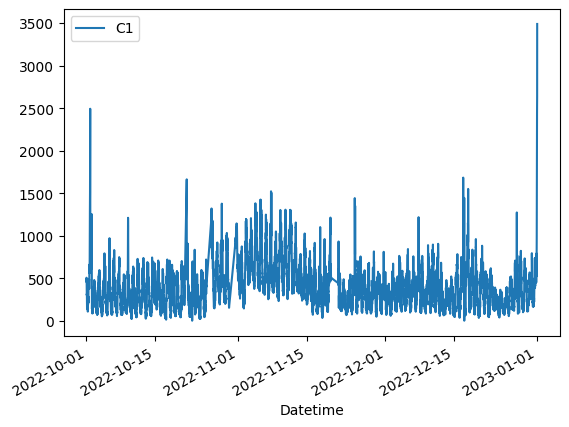

In [ ]:
df.plot()

In [ ]:
from keras.layers import Dense
from keras.layers import LSTM
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

dataset = df
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

  # reshape into X=t and Y=t+1
look_back = 672
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

(6040, 672)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
from keras.layers import Dropout
from keras.layers import Bidirectional
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='sigmoid', return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

#training for all data
history = model.fit(Xdata_train,Ydata_train,batch_size=1,epochs=10,shuffle=False)

Epoch 1/10
6040/6040 [==============================] - 1557s 257ms/step - loss: nan
Epoch 2/10
6040/6040 [==============================] - 1552s 257ms/step - loss: nan
Epoch 3/10
  92/6040 [..............................] - ETA: 27:15 - loss: nan

In [ ]:
#predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# Plot training predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Plot test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train','Train Predict','Test Predict'],loc='best')
plt.show()

In [ ]:
##USING THE model to predict the next DAY

look_back = 96
#Creating future dates
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,look_back+1) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

pred_list = []
batch = train[-look_back:].reshape((1, look_back, 1))
for i in range(look_back):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-look_back:].index, columns=['Prediction'])
df_proj = pd.concat([df,df_predict], axis=1)

plt.figure(figsize=(20, 10))
plt.plot(df_proj.index, df_proj['C1'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(['Actual','Predictions'],loc='best')
plt.xlabel('Date')
plt.ylabel('Numero de pessoas no Terreiro do Paco Previsto na proxima hora')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)



In [14]:
new_dt = ler_grelhas_vodafone_paco()
#DROP TIRAR
#SIGMOIDE NO INICIO EM VEZ DA RELU

#SE TIVER A DIVERGIR USAR A RELU
#SE NAO USAR A SIGMOIDE

#FAZER COORELAÇÃO DO CONGESTIONAMENTO DO TRANSITO E O MOVIMENTO DAS PESSOAS

#Concentração de Pessoas
new_dt['Datetime'] = pd.to_datetime(new_dt['Datetime'], format='%Y.%m.%d %H:%M:%S')

In [15]:
#new_dt = data_vodafone_paco[['Datetime','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11']]
new_dt = new_dt[['Datetime','C1','C3','C5','C6','C9','C11']]
#c1,c3,c5,c6,c9,c11

new_dt['Month'] = new_dt['Datetime'].dt.month
new_dt['Day'] = new_dt['Datetime'].dt.day
new_dt['Weekday'] = new_dt['Datetime'].dt.day_name()

new_dt['Weekday'] = new_dt['Weekday'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})


new_dt['Season'] = new_dt['Month'].apply(month_to_season)

# Criando um mapeamento para o encoding das estações do ano
seasons_encoding = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}

# Aplicar o encoding ao DataFrame para criar a coluna 'Season_Encoded'
new_dt['Season_Encoded'] = new_dt['Season'].map(seasons_encoding)

new_dt['Season'] = new_dt['Month'].apply(month_to_season)

new_dt['Datetime'] = pd.to_datetime(new_dt['Datetime'], format='%Y.%m.%d %H:%M:%S')


new_dt.set_index('Datetime', inplace=True)


<ipython-input-15-8ea79cdb47ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt['Month'] = new_dt['Datetime'].dt.month
<ipython-input-15-8ea79cdb47ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt['Day'] = new_dt['Datetime'].dt.day
<ipython-input-15-8ea79cdb47ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [16]:
new_dt = new_dt.drop(columns=['Season'])
#ELIMINAR A CAMADA DO MEIO


In [26]:
new_dt
new_dt=new_dt.sort_index()

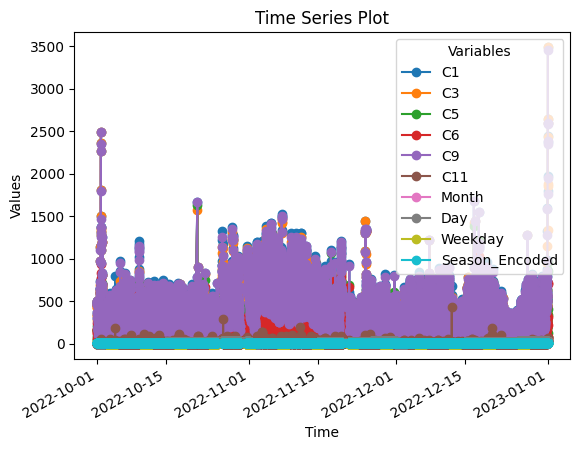

In [27]:
new_dt.plot(kind='line', marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(title='Variables')
plt.show()

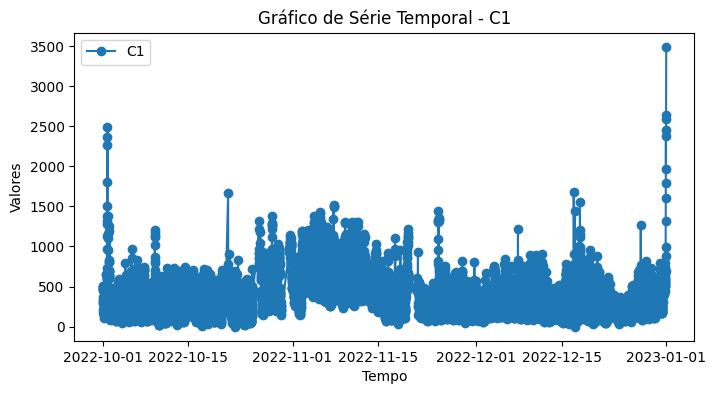

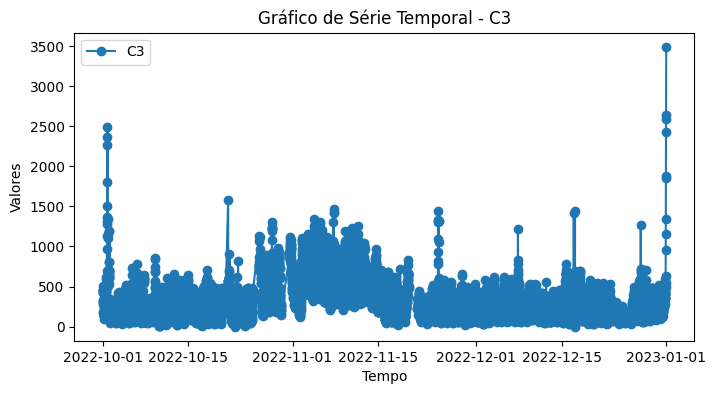

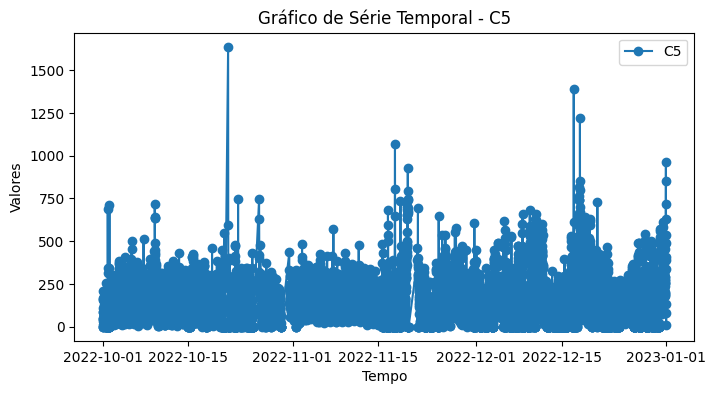

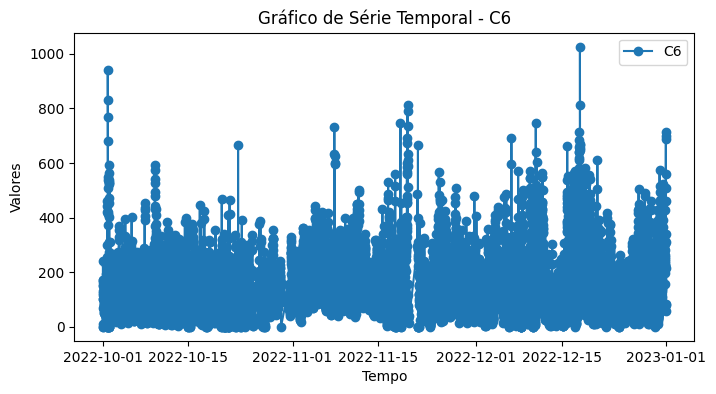

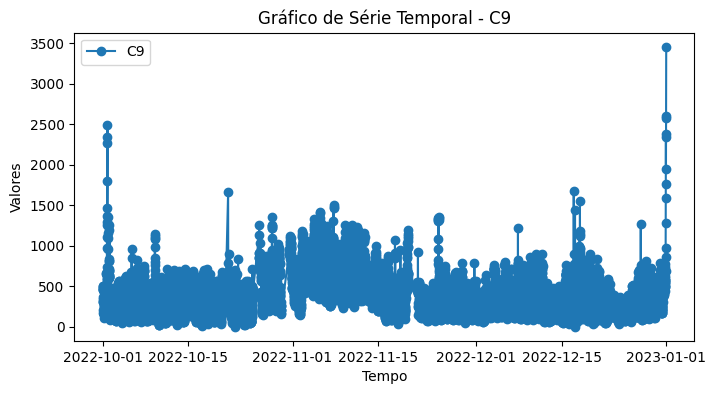

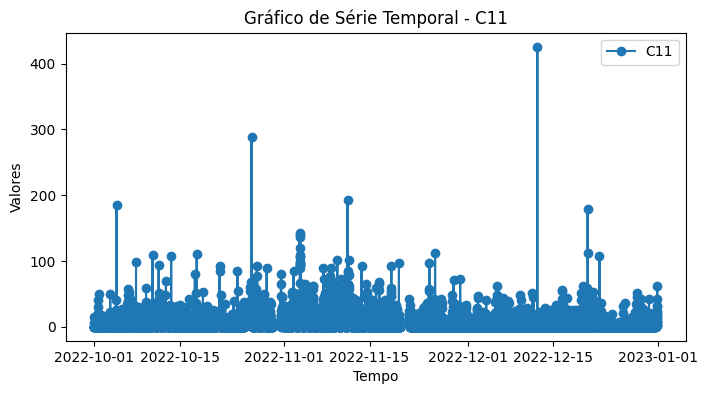

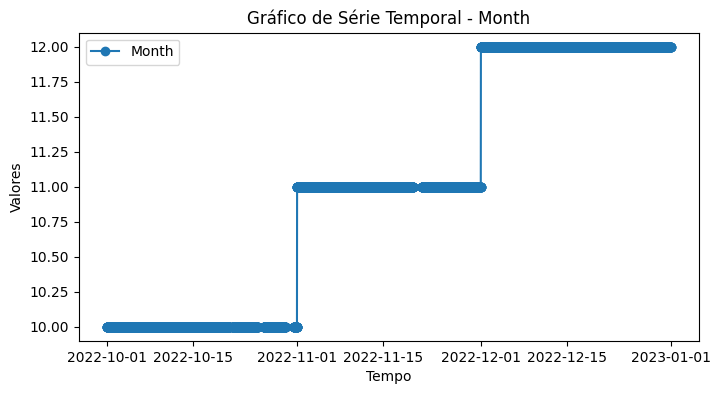

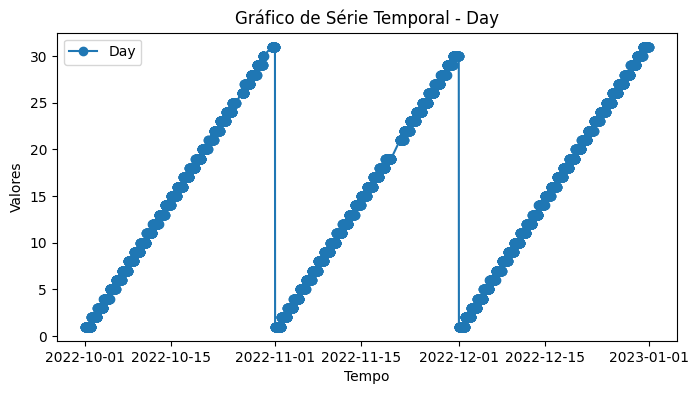

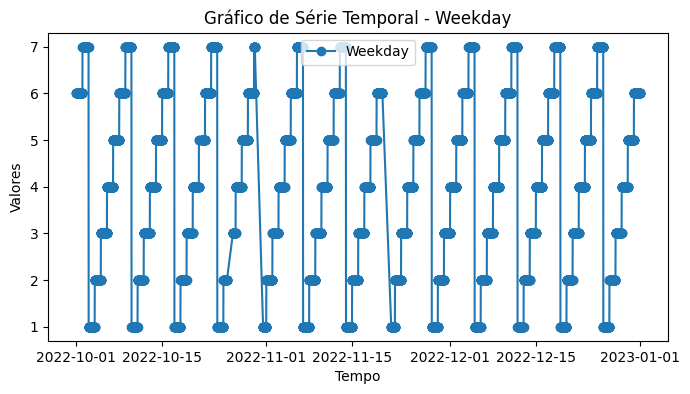

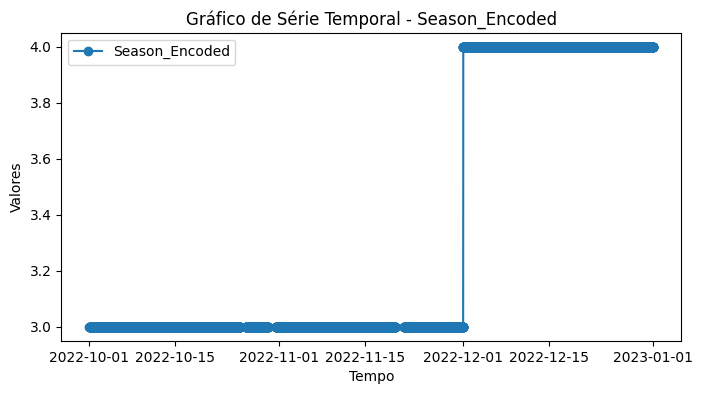

In [28]:
for column in new_dt.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(new_dt.index, new_dt[column], marker='o', linestyle='-', label=column)
    plt.title(f'Gráfico de Série Temporal - {column}')
    plt.xlabel('Tempo')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()

In [24]:
new_dt.head(2000)

,C1,C3,C5,C6,C9,C11,Month,Day,Weekday,Season_Encoded
Datetime,,,,,,,,,,
2022-10-01 00:00:00+00:00,490.420013,431.529999,163.360001,124.129997,490.420013,0.000000,10,1,6,3
2022-10-01 00:15:00+00:00,459.390015,459.390015,0.000000,0.000000,459.390015,0.000000,10,1,6,3
2022-10-01 00:30:00+00:00,461.679993,461.679993,0.000000,0.000000,461.679993,0.000000,10,1,6,3
2022-10-01 00:45:00+00:00,454.730011,454.730011,0.000000,11.380000,449.470001,5.270000,10,1,6,3
2022-10-01 01:00:00+00:00,505.399994,505.399994,11.070000,70.430000,505.399994,0.000000,10,1,6,3
...,...,...,...,...,...,...,...,...,...,...
2022-10-22 10:30:00+00:00,201.949997,114.830002,127.470001,140.479996,201.949997,0.000000,10,22,6,3
2022-10-22 10:45:00+00:00,335.359985,246.899994,288.890015,124.629997,301.350006,34.009998,10,22,6,3
2022-10-22 11:00:00+00:00,274.690002,249.759995,74.870003,48.750000,254.580002,15.290000,10,22,6,3


In [ ]:

dataset = new_dt
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

  # reshape into X=t and Y=t+1
look_back = 672
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

from keras.layers import Dropout
from keras.layers import Bidirectional
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='sigmoid', return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

#training for all data
history = model.fit(Xdata_train,Ydata_train,batch_size=1,epochs=10,shuffle=False)

Splitting Data